# Título:
Agrupación de equipos en base a sus características para la tesis de Luciana Affinito

### ANALISIS EXPLORATORIO DE LOS DATOS

En este apartado exploraremos los datos para poder observar sus características.

In [1]:
#importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
import numpy as np
import seaborn as sea

In [2]:
#Cargamos el dataset y mostramos algunos datos para ver la estructura de los mismos
df=pd.read_csv('Equipos_cluster.csv',sep=';',decimal=',')
equipos=pd.read_csv('Equipos_cluster.csv',sep=';',decimal=',')
df.head()

,common_name,season,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,...,goals_conceded_per_match,win_percentage,first_team_to_score_percentage,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game
0,Villarreal,2021/2022,16,11,11,7,63,37,19,200,...,0.97,42,50,5.26,2.13,1.60,1.38,29,29,1.55
1,FC Barcelona,2021/2022,21,10,7,2,68,38,22,220,...,1.00,55,58,5.79,2.66,1.97,1.11,26,18,1.92
2,Real Madrid,2021/2022,26,8,4,1,80,31,23,220,...,0.82,68,61,5.79,2.00,2.34,1.37,21,11,2.26
3,Sevilla FC,2021/2022,18,16,4,4,53,30,23,175,...,0.79,47,61,4.61,2.66,1.47,1.34,42,11,1.84
4,Atlético Madrid,2021/2022,21,8,9,3,65,43,25,201,...,1.13,55,66,5.29,3.16,1.49,1.17,21,24,1.87


In [3]:
df

,common_name,season,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,...,goals_conceded_per_match,win_percentage,first_team_to_score_percentage,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game
0,Villarreal,2021/2022,16,11,11,7,63,37,19,200,...,0.97,42,50,5.26,2.13,1.60,1.38,29,29,1.55
1,FC Barcelona,2021/2022,21,10,7,2,68,38,22,220,...,1.00,55,58,5.79,2.66,1.97,1.11,26,18,1.92
2,Real Madrid,2021/2022,26,8,4,1,80,31,23,220,...,0.82,68,61,5.79,2.00,2.34,1.37,21,11,2.26
3,Sevilla FC,2021/2022,18,16,4,4,53,30,23,175,...,0.79,47,61,4.61,2.66,1.47,1.34,42,11,1.84
4,Atlético Madrid,2021/2022,21,8,9,3,65,43,25,201,...,1.13,55,66,5.29,3.16,1.49,1.17,21,24,1.87
5,Deportivo Alavés,2021/2022,8,7,23,20,31,65,11,139,...,1.71,21,29,3.66,2.50,0.99,1.66,18,61,0.82
6,RCD Espanyol,2021/2022,10,12,16,14,40,53,16,172,...,1.39,26,42,4.53,2.82,1.17,1.67,32,42,1.11
7,Celta de Vigo,2021/2022,12,10,16,11,43,43,17,167,...,1.13,32,45,4.39,2.39,1.38,1.31,26,42,1.21
8,Granada CF,2021/2022,8,14,16,18,44,61,11,159,...,1.61,21,29,4.18,2.92,1.22,1.79,37,42,1.00
9,Real Betis,2021/2022,19,8,11,5,62,40,17,174,...,1.05,50,45,4.58,2.55,1.66,1.43,21,29,1.71


In [4]:
#exploramos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   common_name                     20 non-null     object 
 1   season                          20 non-null     object 
 2   wins                            20 non-null     int64  
 3   draws                           20 non-null     int64  
 4   losses                          20 non-null     int64  
 5   league_position                 20 non-null     int64  
 6   goals_scored                    20 non-null     int64  
 7   goals_conceded                  20 non-null     int64  
 8   first_team_to_score_count       20 non-null     int64  
 9   corners_total                   20 non-null     int64  
 10  cards_total                     20 non-null     int64  
 11  average_possession              20 non-null     int64  
 12  shots                           20 non

In [5]:
#exploramos los estadisticos descriptivos de las variables
df.describe()

,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,cards_total,average_possession,...,goals_conceded_per_match,win_percentage,first_team_to_score_percentage,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,13.450000,11.100000,13.450000,10.50000,47.550000,47.55000,16.850000,179.050000,104.000000,49.950000,...,1.25100,35.350000,44.450000,4.711500,2.737000,1.419500,1.452000,29.150000,35.350000,1.355000
std,5.316063,2.751076,5.093598,5.91608,13.476978,12.16758,4.120232,24.754532,16.992258,6.660765,...,0.32036,13.910522,10.903766,0.650751,0.447732,0.334609,0.171268,7.154498,13.311155,0.399282
min,8.000000,7.000000,4.000000,1.00000,31.000000,30.00000,11.000000,136.000000,76.000000,41.000000,...,0.79000,21.000000,29.000000,3.580000,2.000000,0.920000,1.110000,18.000000,11.000000,0.820000
25%,9.500000,9.000000,10.750000,5.75000,38.500000,37.75000,14.000000,165.250000,91.750000,45.000000,...,0.99250,24.750000,37.000000,4.345000,2.412500,1.207500,1.362500,24.000000,28.250000,1.030000
50%,11.500000,11.000000,15.000000,10.50000,43.000000,46.50000,16.000000,175.000000,103.500000,48.500000,...,1.22500,30.500000,42.000000,4.610000,2.725000,1.385000,1.440000,29.000000,39.000000,1.225000
75%,17.250000,13.250000,16.500000,15.25000,55.250000,53.00000,19.250000,192.500000,115.500000,55.000000,...,1.39000,45.500000,50.750000,5.065000,3.042500,1.585000,1.585000,34.750000,43.250000,1.650000
max,26.000000,16.000000,23.000000,20.00000,80.000000,76.00000,25.000000,224.000000,139.000000,64.000000,...,2.00000,68.000000,66.000000,5.890000,3.660000,2.340000,1.790000,42.000000,61.000000,2.260000


In [6]:
#elimino las variables que no voy a usar
df.pop('season')
df.pop('common_name')
df.pop('fouls_home')
df.pop('fouls_away')

0     211
1     236
2     187
3     223
4     226
5     254
6     211
7     260
8     229
9     228
10    234
11    224
12    323
13    217
14    245
15    264
16    277
17    260
18    268
19    221
Name: fouls_away, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wins                            20 non-null     int64  
 1   draws                           20 non-null     int64  
 2   losses                          20 non-null     int64  
 3   league_position                 20 non-null     int64  
 4   goals_scored                    20 non-null     int64  
 5   goals_conceded                  20 non-null     int64  
 6   first_team_to_score_count       20 non-null     int64  
 7   corners_total                   20 non-null     int64  
 8   cards_total                     20 non-null     int64  
 9   average_possession              20 non-null     int64  
 10  shots                           20 non-null     int64  
 11  shots_on_target                 20 non-null     int64  
 12  shots_off_target                20 non

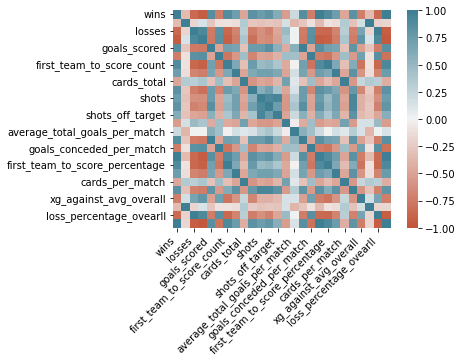

In [8]:
corr = df.corr()
ax = sea.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sea.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

#### TECNICAS DE CLUSTERING (AGRUPAMIENTO) para estudiar a los equipos similares 

# Modelo para los equipos 

In [9]:
#normalizo los datos para aplicar el algoritmo
scal = StandardScaler()
X_std = scal.fit_transform(df)
df_norm = pd.DataFrame(X_std)
df_norm_2 = pd.DataFrame(X_std)

In [10]:
df

,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,cards_total,average_possession,...,goals_conceded_per_match,win_percentage,first_team_to_score_percentage,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game
0,16,11,11,7,63,37,19,200,81,57,...,0.97,42,50,5.26,2.13,1.60,1.38,29,29,1.55
1,21,10,7,2,68,38,22,220,101,64,...,1.00,55,58,5.79,2.66,1.97,1.11,26,18,1.92
2,26,8,4,1,80,31,23,220,76,60,...,0.82,68,61,5.79,2.00,2.34,1.37,21,11,2.26
3,18,16,4,4,53,30,23,175,101,59,...,0.79,47,61,4.61,2.66,1.47,1.34,42,11,1.84
4,21,8,9,3,65,43,25,201,120,50,...,1.13,55,66,5.29,3.16,1.49,1.17,21,24,1.87
5,8,7,23,20,31,65,11,139,95,42,...,1.71,21,29,3.66,2.50,0.99,1.66,18,61,0.82
6,10,12,16,14,40,53,16,172,107,47,...,1.39,26,42,4.53,2.82,1.17,1.67,32,42,1.11
7,12,10,16,11,43,43,17,167,91,55,...,1.13,32,45,4.39,2.39,1.38,1.31,26,42,1.21
8,8,14,16,18,44,61,11,159,111,45,...,1.61,21,29,4.18,2.92,1.22,1.79,37,42,1.00
9,19,8,11,5,62,40,17,174,97,54,...,1.05,50,45,4.58,2.55,1.66,1.43,21,29,1.71


In [11]:
df_norm

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.492140,-0.037294,-0.493491,-0.606977,1.176181,-0.889583,0.535371,0.868295,-1.388721,1.085933,...,-0.899925,0.490474,0.522221,0.864769,-1.390940,0.553450,-0.431316,-0.021510,-0.489436,0.501064
1,1.457119,-0.410231,-1.299192,-1.474087,1.556822,-0.805262,1.282401,1.697217,-0.181137,2.164165,...,-0.803847,1.449297,1.274973,1.700371,-0.176445,1.687946,-2.048749,-0.451720,-1.337279,1.451799
2,2.422098,-1.156105,-1.903467,-1.647509,2.470361,-1.395507,1.531410,1.697217,-1.690617,1.548033,...,-1.380312,2.408119,1.557255,1.700371,-1.688835,2.822441,-0.491221,-1.168737,-1.876815,2.325449
3,0.878131,1.827392,-1.903467,-1.127243,0.414899,-1.479828,1.531410,-0.167857,-0.181137,1.394000,...,-1.476389,0.859252,1.557255,-0.160026,-0.176445,0.154843,-0.670935,1.842732,-1.876815,1.246235
4,1.457119,-1.156105,-0.896342,-1.300665,1.328437,-0.383659,2.029430,0.909741,0.966067,0.007702,...,-0.387512,1.449297,2.027725,0.912067,0.969304,0.216167,-1.689319,-1.168737,-0.874819,1.323322
5,-1.051828,-1.529042,1.923610,1.647509,-1.259922,1.471395,-1.456707,-1.659916,-0.543412,-1.224563,...,1.469984,-1.058392,-1.453751,-1.657802,-0.543085,-1.316935,1.246023,-1.598946,1.977014,-1.374713
6,-0.665836,0.335643,0.513634,0.606977,-0.574768,0.459548,-0.211658,-0.292195,0.181137,-0.454398,...,0.445159,-0.689614,-0.230530,-0.286154,0.190194,-0.765018,1.305928,0.408699,0.512559,-0.629541
7,-0.279844,-0.410231,0.513634,0.086711,-0.346383,-0.383659,0.037351,-0.499425,-0.784929,0.777867,...,-0.387512,-0.247081,0.051752,-0.506879,-0.795150,-0.121115,-0.850650,-0.451720,0.512559,-0.372586
8,-1.051828,1.081518,0.513634,1.300665,-0.270255,1.134113,-1.456707,-0.830994,0.422654,-0.762464,...,1.149726,-1.058392,-1.453751,-0.837967,0.419344,-0.611708,2.024787,1.125716,0.512559,-0.912193
9,1.071127,-1.156105,-0.493491,-0.953821,1.100053,-0.636621,0.037351,-0.209303,-0.422654,0.623834,...,-0.643718,1.080519,0.051752,-0.207324,-0.428510,0.737422,-0.131791,-1.168737,-0.489436,0.912193


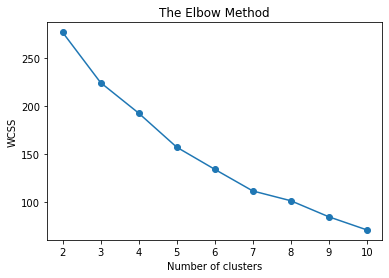

In [12]:
# Encontrar el número de clusters para ello utilizamos el método Elbow.
#Este encuentra el valor óptimo de un hiperparámetro.Nos quedaremos con el número de clusters para el cual la mejora deja de ser sustancial 
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Vamos a utilizar k-means creando 6 cluster y veremos los centroides y la información de cada cluster
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42).fit(df_norm)
df_norm['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2['freq']=df_norm['cluster'].value_counts()
centers2['freq_r']=df_norm['cluster'].value_counts(normalize=True)
print(centers2)

          0         1         2         3         4         5         6  \
0 -0.714085  0.118097  0.681488  0.693688 -0.593800  0.621162 -0.626675   
1  2.422098 -1.156105 -1.903467 -1.647509  2.470361 -1.395507  1.531410   
2  0.878131 -0.037294 -0.896342 -0.953821  0.665034 -0.865491  0.855527   

          7         8         9  ...        18        19        20        21  \
0 -0.578864  0.402528 -0.608431  ... -0.630429 -0.579140  0.402158 -0.570825   
1  1.697217 -1.690617  1.548033  ...  1.557255  1.700371 -1.688835  2.822441   
2  0.749878 -0.448531  0.821877  ...  0.858271  0.749902 -0.448152  0.575351   

         22        23        24        25  freq  freq_r  
0  0.557116  0.121893  0.679559 -0.725900    12    0.60  
1 -0.491221 -1.168737 -1.876815  2.325449     1    0.05  
2 -0.884882 -0.041997 -0.896841  0.912193     7    0.35  

[3 rows x 28 columns]


In [14]:
centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.714085,0.118097,0.681488,0.693688,-0.593800,0.621162,-0.626675,-0.578864,0.402528,-0.608431,...,0.621300,-0.714200,-0.630429,-0.579140,0.402158,-0.570825,0.557116,0.121893,0.679559,-0.725900
1,2.422098,-1.156105,-1.903467,-1.647509,2.470361,-1.395507,1.531410,1.697217,-1.690617,1.548033,...,-1.380312,2.408119,1.557255,1.700371,-1.688835,2.822441,-0.491221,-1.168737,-1.876815,2.325449
2,0.878131,-0.037294,-0.896342,-0.953821,0.665034,-0.865491,0.855527,0.749878,-0.448531,0.821877,...,-0.867899,0.880325,0.858271,0.749902,-0.448152,0.575351,-0.884882,-0.041997,-0.896841,0.912193


In [15]:
#Utilizamos ahora la tecnica de silhouette para poder evaluar nuestra tecnica.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
df['S_S'] = silhouette_samples(df_norm,df_norm['cluster'])
silhouette_score_mean = silhouette_score(df_norm,df_norm['cluster'])
print(silhouette_score_mean)


df['cluster']=kmeans.labels_
Centers_mean=df.groupby('cluster').mean()
Centers_mean['freq']=df['cluster'].value_counts()
Centers_mean['freq_r']=df['cluster'].value_counts(normalize=True)
Centers_mean

0.3266923597362006


,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,cards_total,average_possession,...,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game,S_S,freq,freq_r
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.75,11.416667,16.833333,14.5,39.750000,54.916667,14.333333,165.083333,110.666667,46.000000,...,4.344167,2.912500,1.233333,1.545000,30.000000,44.166667,1.0725,0.355950,12,0.60
1,26.00,8.000000,4.000000,1.0,80.000000,31.000000,23.000000,220.000000,76.000000,60.000000,...,5.790000,2.000000,2.340000,1.370000,21.000000,11.000000,2.2600,0.000000,1,0.05
2,18.00,11.000000,9.000000,5.0,56.285714,37.285714,20.285714,197.142857,96.571429,55.285714,...,5.187143,2.541429,1.607143,1.304286,28.857143,23.714286,1.7100,0.323206,7,0.35


In [16]:
# Prueba con AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df_norm)
df['cluster_hc']=y_hc
df_norm['cluster_hc']=y_hc
df['S_S_hc'] = silhouette_samples(df_norm,df_norm['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(df_norm,df_norm['cluster_hc'])
print(silhouette_score_mean_hc)


0.33255738780679733


In [17]:
Centers_mean_hc=df.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=df['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=df['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,cards_total,average_possession,...,corners_per_match,cards_per_match,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,,,,,,,,,
0,9.75,11.416667,16.833333,14.5,39.750000,54.916667,14.333333,165.083333,110.666667,46.000000,...,4.344167,2.912500,1.233333,1.545000,30.000000,44.166667,1.0725,0.361783,12,0.60
1,18.00,11.000000,9.000000,5.0,56.285714,37.285714,20.285714,197.142857,96.571429,55.285714,...,5.187143,2.541429,1.607143,1.304286,28.857143,23.714286,1.7100,0.329964,7,0.35
2,26.00,8.000000,4.000000,1.0,80.000000,31.000000,23.000000,220.000000,76.000000,60.000000,...,5.790000,2.000000,2.340000,1.370000,21.000000,11.000000,2.2600,0.000000,1,0.05


In [18]:
#variables que representan mayormente a mis variables del modelo de dato
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_df=pca.fit_transform(df_norm_2)
pca_df_df=pd.DataFrame(data=pca_df, columns=['Componente_1','Componente_2'])
pca_nombres_df=pd.concat([pca_df_df,df_norm[['cluster_hc']]],axis=1)
#defe_norm['PCA1']=pca_def_df['Componente_1']
#defe_norm['PCA2']=pca_def_df['Componente_2']
pca_nombres_df

,Componente_1,Componente_2,cluster_hc
0,3.235898,-0.213809,1
1,6.235411,-0.215302,1
2,9.886332,-2.748837,2
3,3.527325,4.007751,1
4,4.133270,0.003582,1
5,-5.646116,-2.728134,0
6,-2.287788,0.153901,0
7,-0.534252,0.323325,0
8,-3.720728,-0.704282,0
9,3.015320,-1.483159,1


In [19]:
pca.explained_variance_ratio_*100

array([61.00742862, 13.36093657])

In [20]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
#range_n_clusters = range(2, 15)
#valores_medios_silhouette = []

#for n_clusters in range_n_clusters:
   # modelo = AgglomerativeClustering(
                    #affinity   = 'euclidean',
                   # linkage    = 'ward',
                    #n_clusters = n_clusters
             #)

    #cluster_labels = modelo.fit_predict(df_norm)
    #silhouette_avg = silhouette_score(df_norm, cluster_labels)
    #valores_medios_silhouette.append(silhouette_avg)
    
#fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
#ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
#ax.set_title("Evolución de media de los índices silhouette")
#ax.set_xlabel('Número clusters')
#ax.set_ylabel('Media índices silhouette');

In [21]:
#import scipy.cluster.hierarchy as sch
#plt.figure(figsize = (10,7))
#plt.title('Dendrograms')
#plt.axhline(y=8, color='r', linestyle='--')
#dend = sch.dendrogram(sch.linkage(pca_nombres_df, method='ward'))

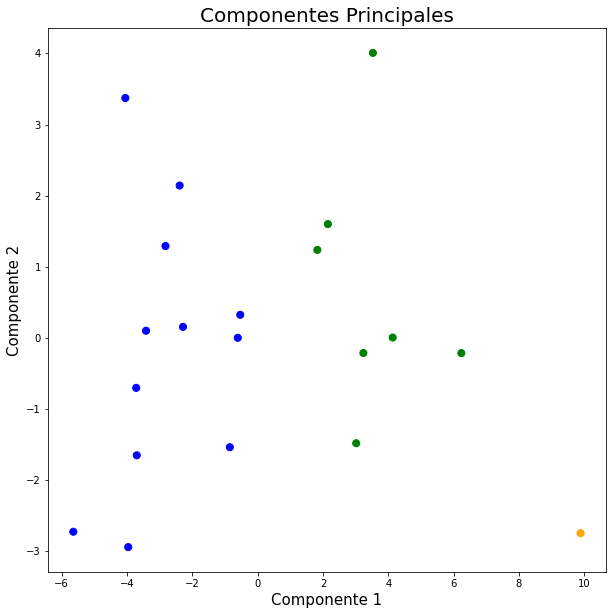

In [22]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot()
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green","orange","red","yellow","blueviolet","aquamarine","brown"])
ax.scatter(x=pca_nombres_df.Componente_1,y=pca_nombres_df.Componente_2, c=color_theme[pca_nombres_df.cluster_hc],s=50)
plt.show()

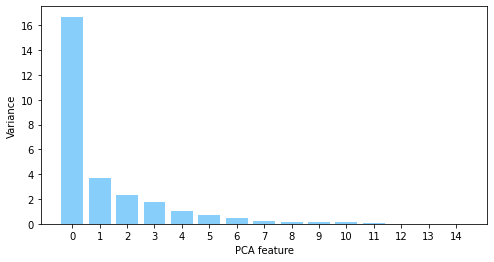

In [23]:
pca = PCA(random_state=123)
pca.fit(df_norm_2)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [24]:
model=PCA(n_components=2).fit(df_norm_2)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
#cuanto más alto sea el valor en valor absoluto, mayor será la influencia de la variable en el componente principal.
df_norm_2.columns[most_important]
X_train_pca=df_norm_2[df_norm_2.columns[most_important]]
X_train_pca.head()

,25,1
0,0.501064,-0.037294
1,1.451799,-0.410231
2,2.325449,-1.156105
3,1.246235,1.827392
4,1.323322,-1.156105


In [25]:
df['common_name']=equipos['common_name']

In [26]:
df

,wins,draws,losses,league_position,goals_scored,goals_conceded,first_team_to_score_count,corners_total,cards_total,average_possession,...,xg_for_avg_overall,xg_against_avg_overall,draw_percentage_overall,loss_percentage_ovearll,points_per_game,S_S,cluster,cluster_hc,S_S_hc,common_name
0,16,11,11,7,63,37,19,200,81,57,...,1.60,1.38,29,29,1.55,0.446485,2,1,0.451676,Villarreal
1,21,10,7,2,68,38,22,220,101,64,...,1.97,1.11,26,18,1.92,0.131426,2,1,0.143468,FC Barcelona
2,26,8,4,1,80,31,23,220,76,60,...,2.34,1.37,21,11,2.26,0.000000,1,2,0.000000,Real Madrid
3,18,16,4,4,53,30,23,175,101,59,...,1.47,1.34,42,11,1.84,0.375403,2,1,0.379608,Sevilla FC
4,21,8,9,3,65,43,25,201,120,50,...,1.49,1.17,21,24,1.87,0.347581,2,1,0.352305,Atlético Madrid
5,8,7,23,20,31,65,11,139,95,42,...,0.99,1.66,18,61,0.82,0.446399,0,0,0.448890,Deportivo Alavés
6,10,12,16,14,40,53,16,172,107,47,...,1.17,1.67,32,42,1.11,0.424565,0,0,0.430325,RCD Espanyol
7,12,10,16,11,43,43,17,167,91,55,...,1.38,1.31,26,42,1.21,0.133471,0,0,0.146352,Celta de Vigo
8,8,14,16,18,44,61,11,159,111,45,...,1.22,1.79,37,42,1.00,0.461237,0,0,0.464763,Granada CF
9,19,8,11,5,62,40,17,174,97,54,...,1.66,1.43,21,29,1.71,0.365027,2,1,0.370963,Real Betis


In [27]:
#prueba=defensores[defensores['cluster_hc']==2]
#prueba

In [28]:
df.to_csv('cluster_equipos_final.csv',index=False)